<a href="https://colab.research.google.com/github/puji-123/week2/blob/main/wasteclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!Pip install pandas
!pip install tqdm
!pip install glob
!pip install tensorflow

/bin/bash: line 1: Pip: command not found
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path="/content/DATASET.zip"
test_path="/content/DATASET.zip"

In [ ]:
# Importing libraries
from tensorflow.keras.models import Sequential # Changed 'sequential' to 'Sequential'
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
# visualization
# Instead of importing cvtcolor, use cv2.cvtColor directly
import cv2
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        # Correct the function name to cv2.cvtColor
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1]) # Fix typo: 'spilt' to 'split'
        data = pd.DataFrame({"image":x_data,"lable":y_data})
        data.shape

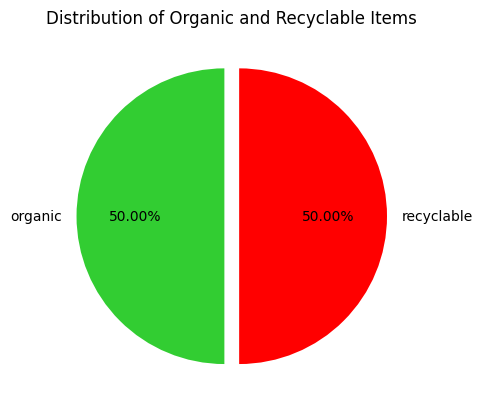

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data creation for demonstration
# Replace this with your actual DataFrame (assuming 'label' column exists)
data = pd.DataFrame({'label': ['organic', 'recyclable', 'organic', 'organic', 'recyclable', 'recyclable']})

# Define the colors for the pie chart
colors = ['#32CD32', '#FF0000']

# Value counts for the 'label' column
counts = data['label'].value_counts()

# Pie chart labels (adjust based on the data)
labels = counts.index.tolist()

# Exploding the slices slightly
explode = [0.05] * len(counts)

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%0.2f%%', colors=colors, startangle=90, explode=explode)
plt.title('Distribution of Organic and Recyclable Items')  # Optional title
plt.show()

DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.
DataFrame is empty. Cannot display images.


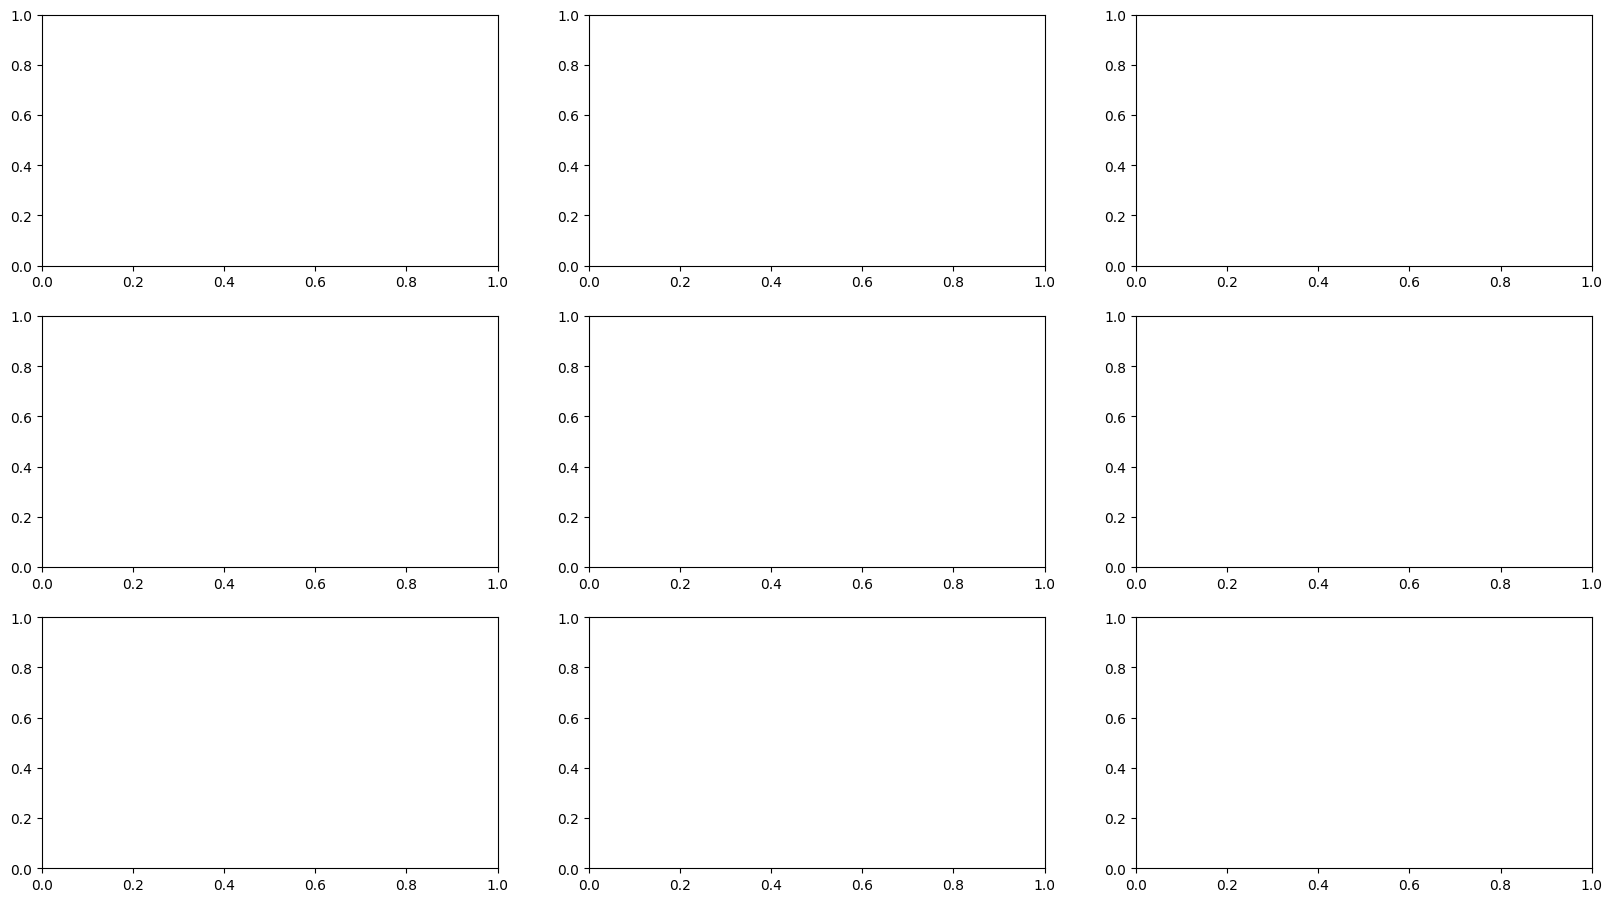

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(9):
  plt.subplot(4, 3,(i%12)+1)
  # Ensure the index is within the bounds of the DataFrame
  if len(data) > 0:  # Check if the DataFrame is not empty
    index = np.random.randint(len(data))
    # Access the column using its correct name 'lable' if it exists
    if 'lable' in data.columns:
        plt.title('this is of {0}'.format(data.lable[index]))
    else:
        print("Column 'lable' not found in the DataFrame.")
    plt.imshow(data.image[index])
    plt.tight_layout()
  else:
    print("DataFrame is empty. Cannot display images.")

In [ ]:
#Importing necessary libraries
from tensorflow.keras.models import Sequential # This line is crucial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
model = Sequential()
model.add(Conv2D(32, (3,3) , input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale =1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_path = "/content/DATASET.rar"
test_path = "/content/DATASET.rar"

In [ ]:
!apt-get install unrar # Install the unrar utility
!pip install patool # Install patool to extract rar files
import patoolib

# Assuming DATASET.rar is in the current directory:
train_path = "/content/DATASET.rar"
extract_dir = "/content/dataset"  # Choose a directory for extraction

# Extract the rar file, adding error handling
try:
    patoolib.extract_archive(train_path, outdir=extract_dir, verbosity=-1)  # Suppress verbose output
except patoolib.util.PatoolError as e:
    print(f"Error extracting archive: {e}")
    # Additional error handling or alternative extraction method can be added here

# Update train_path and test_path
train_path = extract_dir
test_path = extract_dir

# Use flow_from_directory with the extracted directory:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Error extracting archive: Command `['/usr/bin/unrar', 'x', '-kb', '-or', '--', '/content/DATASET.rar']' returned non-zero exit status 3
Found 11787 images belonging to 1 classes.
Found 11787 images belonging to 1 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epoachs=10,
    validation_data=test_generator
)